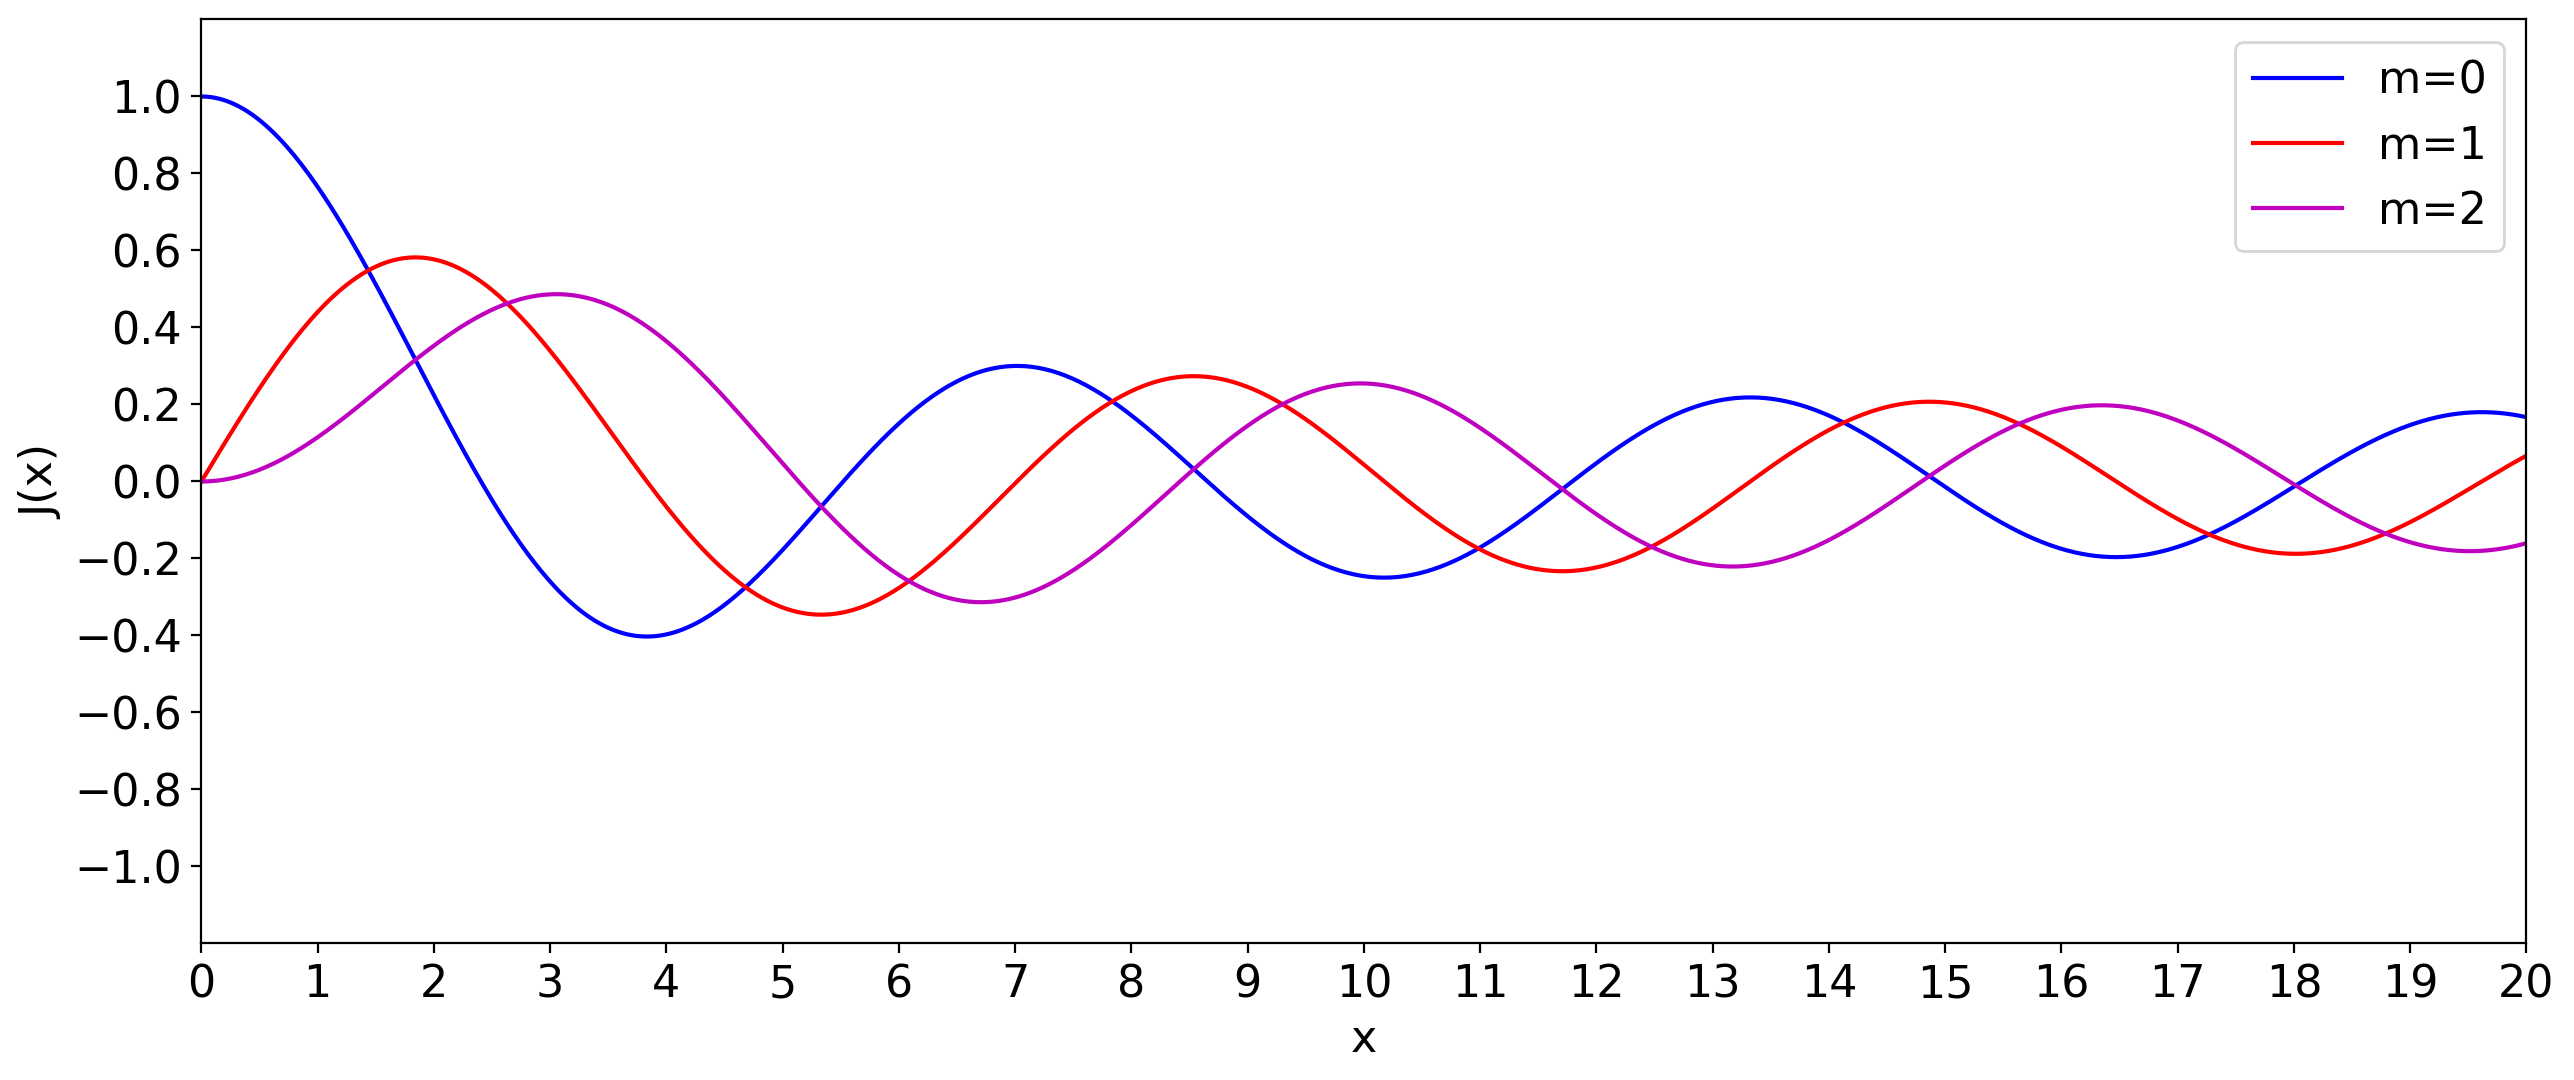

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size':16})



N = 10000

def integrate(f, m, x):
    
    sum = 0
    
    for k in range(1, N-1):
        sum += f(k*np.pi*(1/N), m, x)
        
    area = (np.pi/N) * (0.5*f(0,m,x) + 0.5*f(np.pi,m,x) + sum)
        
    return area
    
    
def fTheta(theta, m, x):
    
    return np.cos((m*theta)-(x*np.sin(theta)))


def J(m, x):
    
    return 1/np.pi * integrate(fTheta, m, x)


x = np.linspace(0, 20, 1000)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)


ax.plot(x, J(0,x), color='b', linestyle='-', label= 'm=0')
ax.plot(x, J(1,x), color='r', linestyle='-', label= 'm=1')
ax.plot(x, J(2,x), color='m', linestyle='-', label= 'm=2')


ax.set_xlabel('x')
ax.set_ylabel('J(x)')


ax.set(xlim=(0, 20), xticks=np.arange(0, 21),
       ylim=(-1.2, 1.2), yticks=np.arange(-1,1.2, 0.2))

ax.legend()
plt.show()

<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mp2521\AppData\Local\Temp\ipykernel_4024\3891655321.py:58: SyntaxWarning: invalid escape sequence '\m'
  ar.set_xlabel('r / $\mu$m')


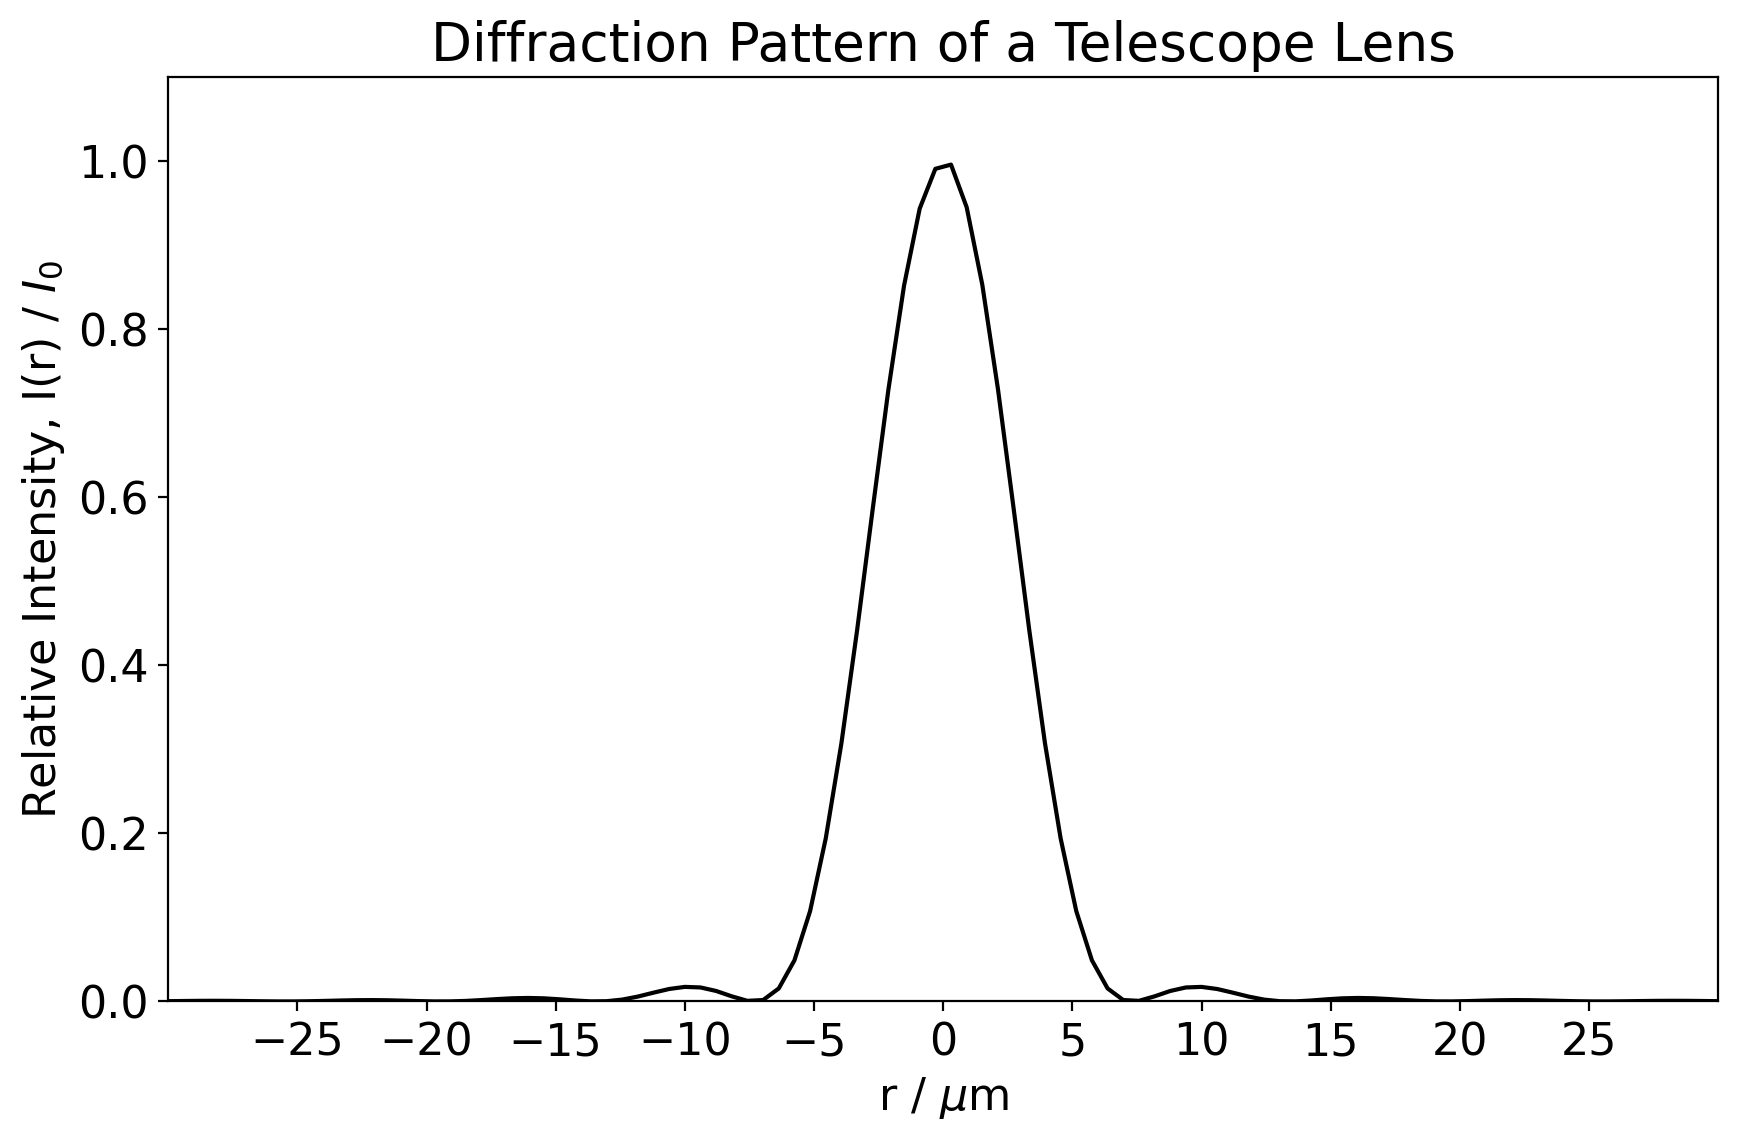

In [7]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size':16})


#Creating the function for J(m, x):

#1. Making a function to integrate using with the given conditions using the trapezium rule:
N = 10000

def integrate(f, m, x):
    
    sum = 0
    
    for k in range(1, N-1):
        sum += f(k*np.pi*(1/N), m, x)
        
    area = (np.pi/N) * (0.5*f(0,m,x) + 0.5*f(np.pi,m,x) + sum)
        
    return area
    
#2. Defining the function for theta for intgerating:  
def fTheta(theta, m, x):
    
    return np.cos((m*theta)-(x*np.sin(theta)))

#3. Integrating the function and multiplying by 1/pi to find the Bessel function:
def J(m, x):
    
    return 1/np.pi * integrate(fTheta, m, x)



#Using this function to make a function for intensity:

#1. Giving the values for inserting into the fucntion:
i0 = 1
wavelength = 0.0000006

#2. Defining the function for intensity (To plot r in micrometers, r*10**-6 is used for r):

def I(r):
    x = r * 10**-6 * np.pi / (10*wavelength)
    return i0 * (2*J(1,x)/x)**2

#3. Plotting the function:

r = np.linspace (-30, 30, 100)

fig = plt.figure(figsize=(10,6))
ar= fig.add_subplot(1,1,1)

ar.plot(r, I(r), color='k', linestyle='-')
ar.set_xlabel('r / $\mu$m')
ar.set_ylabel('Relative Intensity, I(r) / $I_0$')
ar.set_title('Diffraction Pattern of a Telescope Lens')

ar.set(xlim=(-30, 30), xticks=np.arange(-25, 30, 5),
       ylim=(0, 1.1), yticks=np.arange(0,1.1, 0.2))

plt.show()